Objective: Perform a geographical analysis of the restaurants in the dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from geodatasets import get_path
import geopandas as gpd
import plotly.express as px
from folium.plugins import HeatMap
from scipy.stats import pearsonr
from folium.plugins import MarkerCluster
from IPython.display import IFrame

In [26]:
df = pd.read_csv(r"C:\\Users\\UNKNOWN_CODER\\Cognifyz_Technologies_Internship\\Task2\\Dataset.csv")

In [31]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [30]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map)
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)
map_file_path = 'restaurants_map.html'
map.save(map_file_path)
IFrame(map_file_path, width=800, height=600)

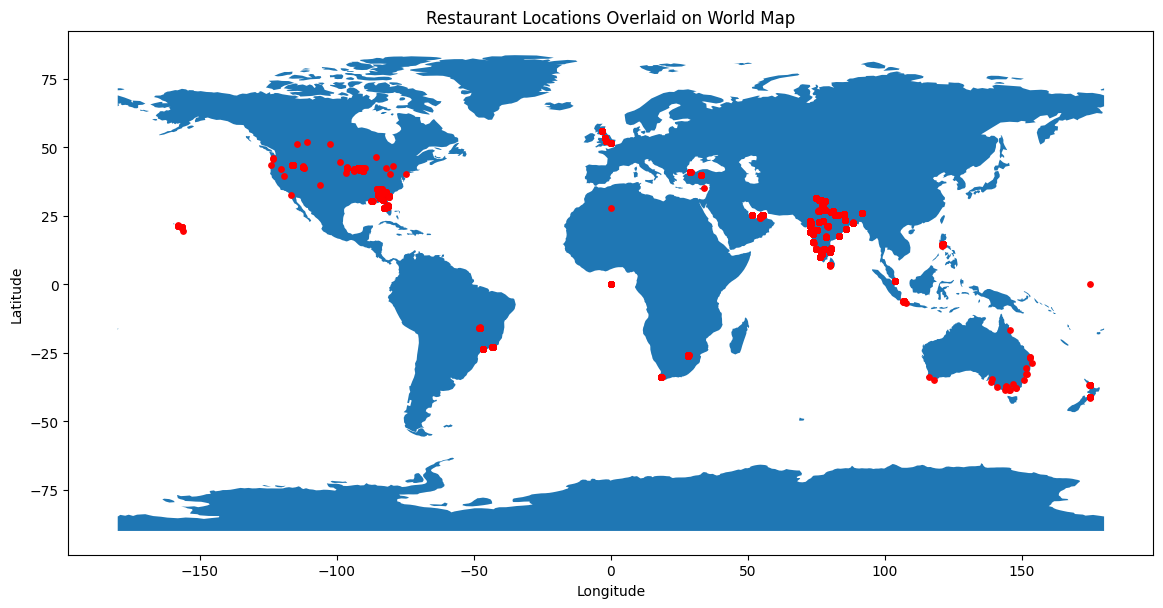

In [33]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Load world map data using geodatasets
world = gpd.read_file(get_path('naturalearth.land'))

# Plotting the map
fig, ax = plt.subplots(figsize=(14, 12))
world.plot(ax=ax, legend=True)

# Plotting the restaurant locations
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
ax.set_title('Restaurant Locations Overlaid on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [34]:
restaurants_by_city = df['City'].value_counts().head(10).reset_index(name='Count')
restaurants_by_city

,City,Count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Amritsar,21
7,Ahmedabad,21
8,Lucknow,21
9,Guwahati,21


In [35]:
restaurants_by_locality = df['Locality'].value_counts().head(10).reset_index(name='Count')
restaurants_by_locality

,Locality,Count
0,Connaught Place,122
1,Rajouri Garden,99
2,Shahdara,87
3,Defence Colony,86
4,Malviya Nagar,85
5,Pitampura,85
6,Mayur Vihar Phase 1,84
7,Rajinder Nagar,81
8,Safdarjung,80
9,Satyaniketan,79


In [41]:
colors = sns.color_palette("Set1")

Distribution By City

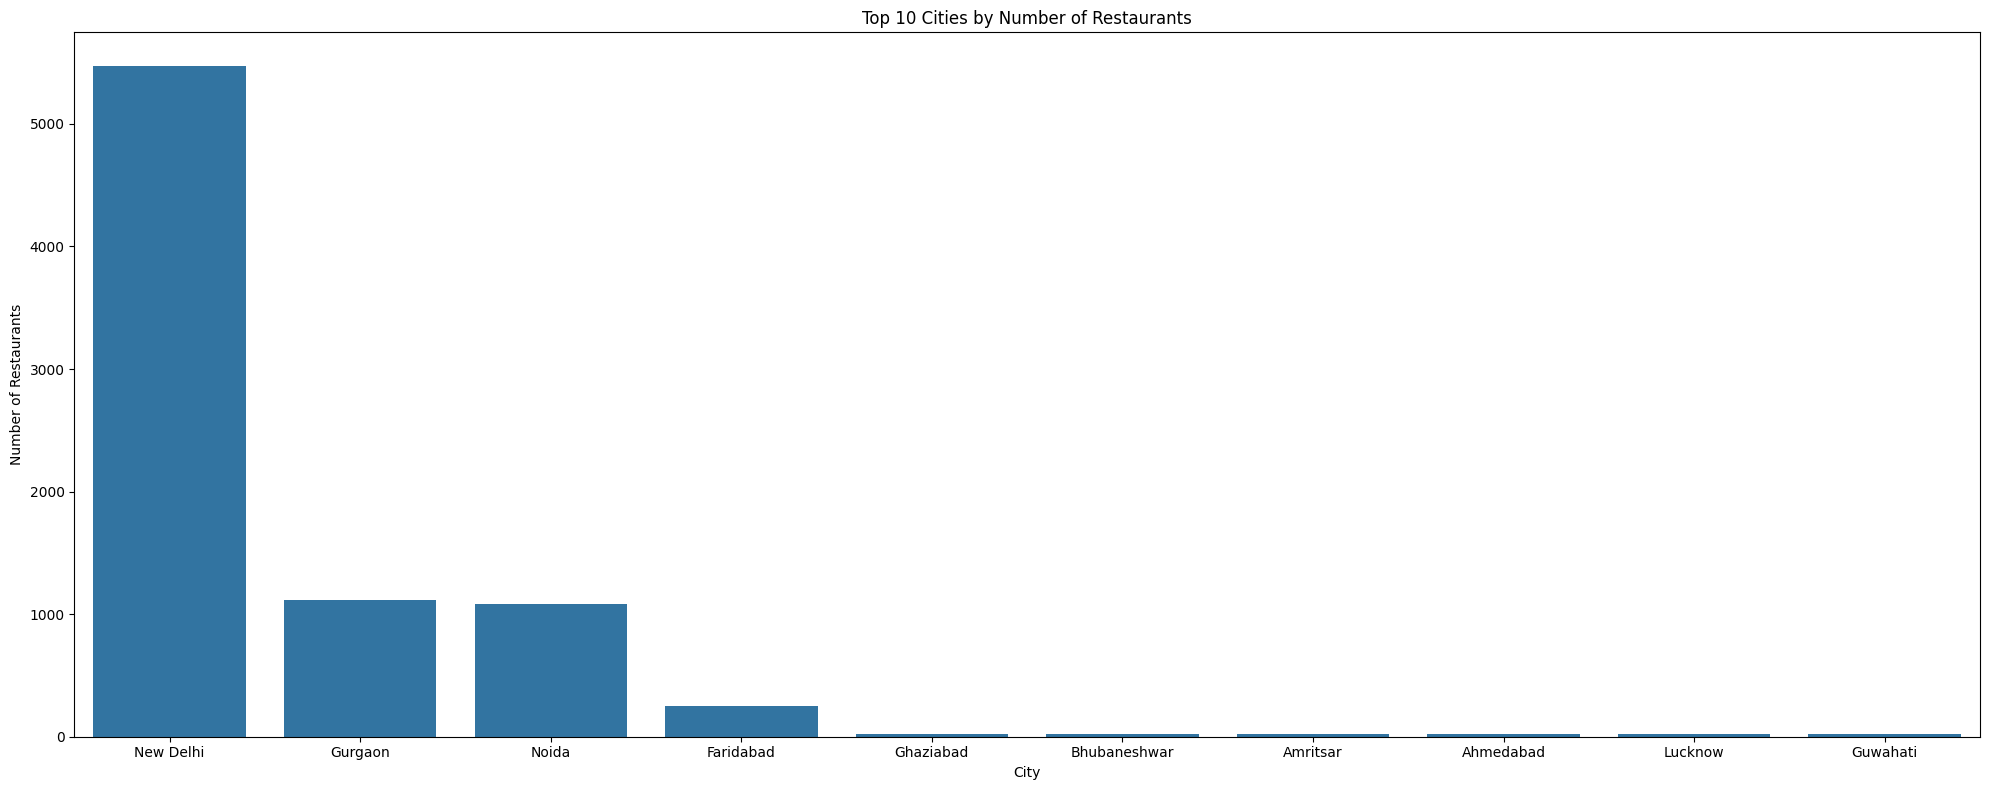

In [42]:
plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Count', data=restaurants_by_city)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

Distribution BY Locality

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Locality', y='Count', data=restaurants_by_locality)
plt.title('Top 10 Localities by Number of Restaurants')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

Average Ratings by city

In [44]:
avg_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Ratings by City:")
print(avg_by_city.head(10))

Average Ratings by City:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64


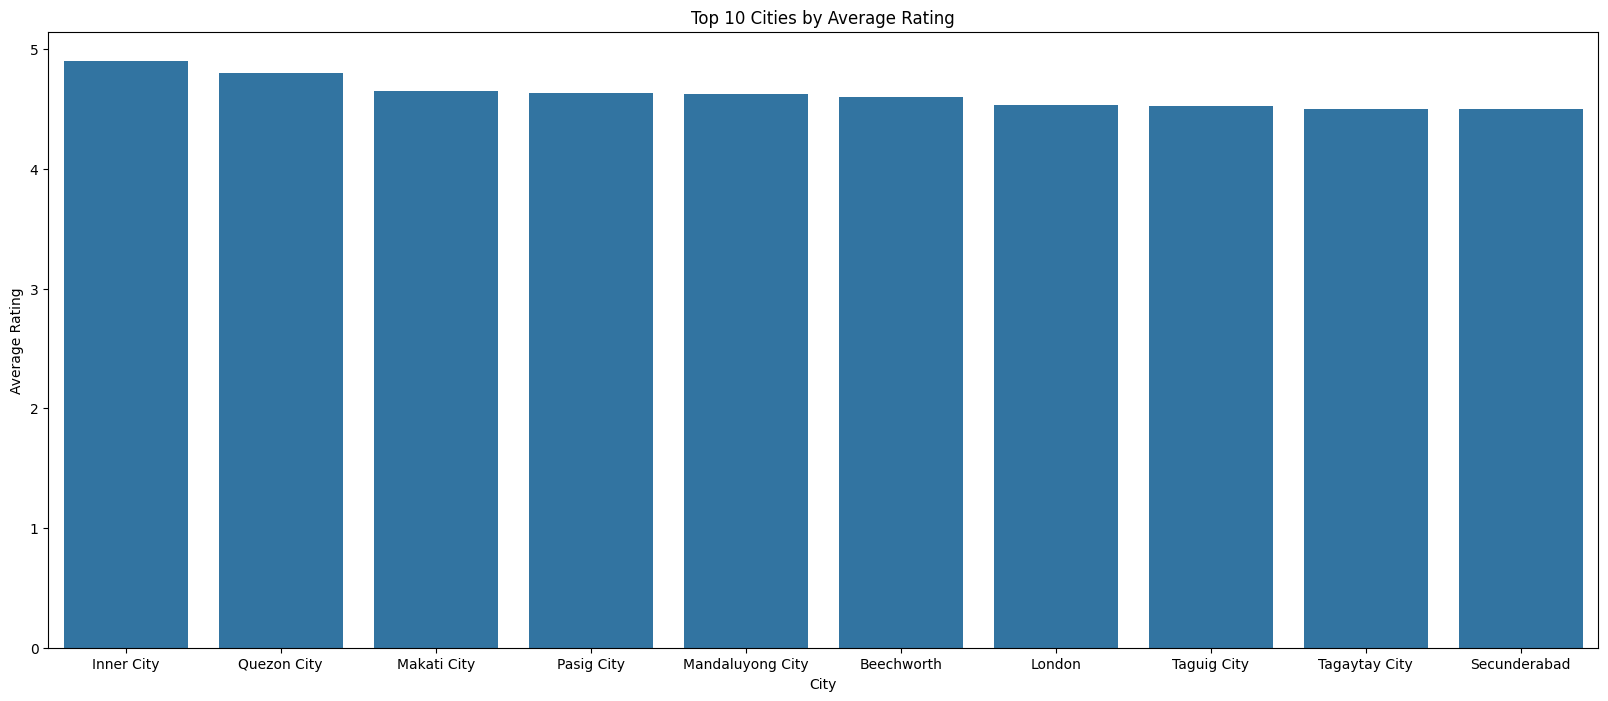

In [45]:
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values)
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

In [46]:
avg_by_locality = df.groupby('Locality')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by Locality:")
print(avg_by_locality.head(10))


Average Ratings by Locality:
Locality
Pondok Aren                         4.9
Venetian Village, Al Maqtaa         4.9
Hotel Clarks Amer, Malviya Nagar    4.9
Bebek                               4.9
DIFC                                4.9
Beak Street, Soho                   4.9
The Milk District                   4.9
Kenwood                             4.9
Paia                                4.9
Taman Impian Jaya Ancol, Ancol      4.9
Name: Aggregate rating, dtype: float64


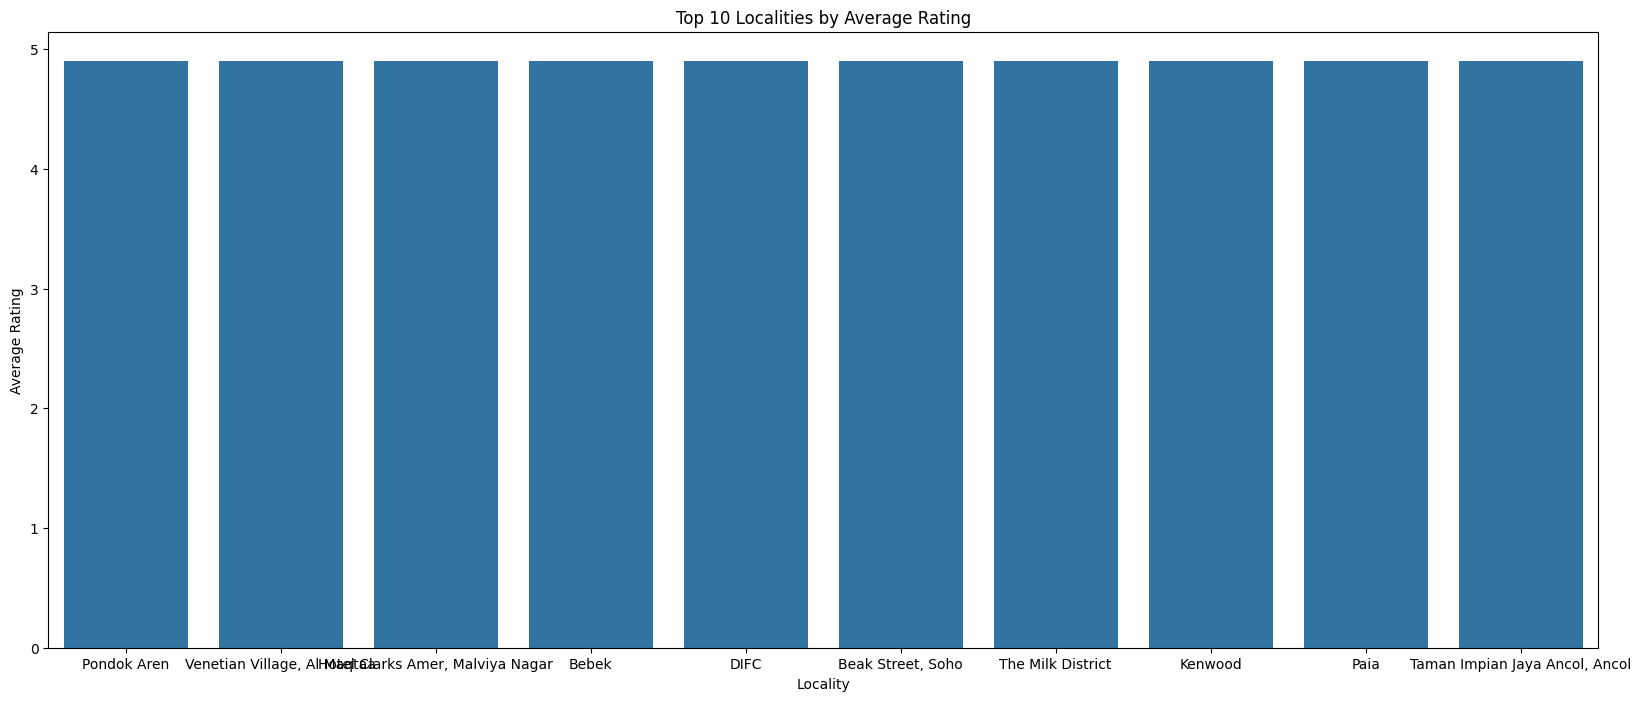

In [47]:
avg_ratings_by_city = df.groupby('Locality')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values)
plt.title('Top 10 Localities by Average Rating')
plt.xlabel('Locality')
plt.ylabel('Average Rating')
plt.show()

Cuisines By City

In [48]:
cuisines_by_city = df.groupby('City')['Cuisines'].nunique().sort_values(ascending=False)
print("\nUnique Cuisines by City:")
print(cuisines_by_city.head(10))


Unique Cuisines by City:
City
New Delhi     892
Gurgaon       362
Noida         248
Faridabad      87
Ahmedabad      21
Coimbatore     20
Jaipur         20
Sharjah        20
Des Moines     20
Colombo        20
Name: Cuisines, dtype: int64


Cuisisne By Locality

In [49]:
cuisines_by_locality = df.groupby('Locality')['Cuisines'].nunique().sort_values(ascending=False)
print("\nUnique Cuisines by Locality:")
print(cuisines_by_locality.head(10))


Unique Cuisines by Locality:
Locality
Connaught Place           90
Rajouri Garden            71
Satyaniketan              61
Malviya Nagar             60
Defence Colony            55
Sector 18                 52
Safdarjung                52
Greater Kailash (GK) 1    50
Greater Kailash (GK) 2    50
Karol Bagh                47
Name: Cuisines, dtype: int64


In [50]:
df['Cuisines'] = df['Cuisines'].str.split(', ')

In [51]:
df = df.explode('Cuisines')

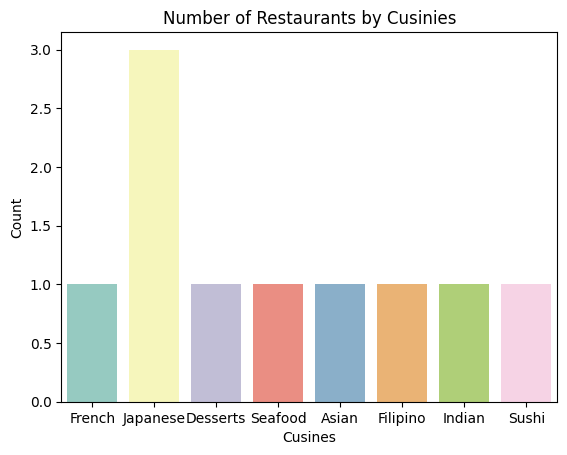

In [66]:
sns.countplot(x='Cuisines', hue='Cuisines', data=df.head(10),palette='Set3')
plt.title('Number of Restaurants by Cusinies')
plt.xlabel('Cusines')
plt.ylabel('Count')
plt.show()

Price Range by City

In [56]:
pricerange_by_city = df.groupby('City')['Price range'].describe()
pricerange_by_city

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Abu Dhabi,46.0,3.152174,0.815609,2.0,2.25,3.0,4.0,4.0
Agra,49.0,2.551020,1.061862,1.0,2.00,3.0,3.0,4.0
Ahmedabad,76.0,2.618421,0.631762,1.0,2.00,3.0,3.0,4.0
Albany,44.0,1.931818,0.949853,1.0,1.00,2.0,3.0,4.0
Allahabad,47.0,2.638298,0.704814,1.0,2.00,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...
Weirton,3.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0
Wellington City,34.0,3.323529,0.767546,1.0,3.00,3.0,4.0,4.0
Winchester Bay,3.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0


In [57]:
df = df.rename(columns={'price_range': 'Price range'})

In [58]:
pricerange_by_locality = df.groupby('Locality')['Price range'].describe()
pricerange_by_locality

,count,mean,std,min,25%,50%,75%,max
Locality,,,,,,,,
"ILD Trade Centre Mall, Sohna Road",4.0,1.500000,0.577350,1.0,1.0,1.5,2.0,2.0
"12th Square Building, Banjara Hills",3.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
"A Hotel, Gurdev Nagar",3.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
"ARSS Mall, Paschim Vihar",5.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Aaya Nagar,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
"ibis New Delhi, Aerocity",3.0,1.666667,1.154701,1.0,1.0,1.0,2.0,3.0
�ayyolu,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
�guas Claras,5.0,3.600000,0.547723,3.0,3.0,4.0,4.0,4.0


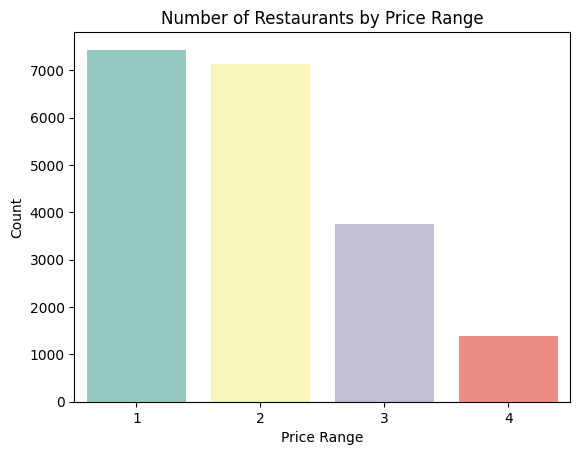

In [64]:
sns.countplot(x='Price range', data=df, hue='Price range', palette='Set3', legend=False)
plt.title('Number of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()